# AP van aparte detector en herkenner bij model zonder FPN

Sweep [qn6l4ir1](https://wandb.ai/jpdr/experiments/sweeps/qn6l4ir1)

In [1]:
from pathlib import Path
import pandas as pd

from wandb_loader import get_sweep_results, EPOCH, COCO_AP


df_no_fpn = get_sweep_results("qn6l4ir1", lazy=True)
df_fpn = get_sweep_results("310owxsf", lazy=True)

df_no_fpn['FPN'] = 'With FPN'
df_fpn['FPN'] = 'Without FPN'

df = pd.concat([df_fpn, df_no_fpn], ignore_index=True)

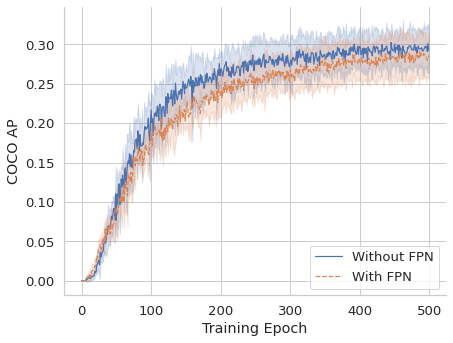

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette()

sns.set(
    style='whitegrid',
    font_scale=1.2,
    rc={
        'lines.linewidth': 1.2,
        'lines.markersize': 18,
    }
)

fig = sns.relplot(
    data=df,
    x=EPOCH, y=COCO_AP, hue='FPN', style='FPN', kind='line', ci='sd', aspect=4/3
)
fig.legend.remove()
plt.legend(loc='lower right')

In [3]:
fig_path = Path('./imgs')
if not fig_path.exists():
    fig_path.mkdir(parents=True)

fig.savefig(fig_path / 'COCO_AP_no_FPN_separate.png')